In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_excel('C:\\Users\\mpkha\\Desktop\\COLLEGE\\8th sem\\project\\data.xlsx')

In [ ]:
plastic_groups = data.groupby('plastic_type')

----- HDPE -----


C:\Users\mpkha\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Composition with the highest equivalent stress: 90
Density of the composition with the highest equivalent stress: 895.0




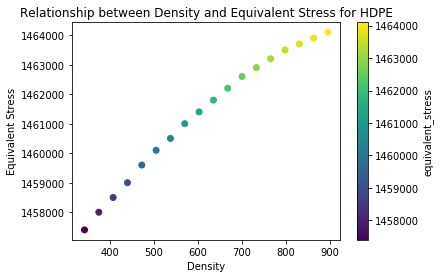

----- HDPE+LDPE -----
Composition with the highest equivalent stress: 5
Density of the composition with the highest equivalent stress: 296.85




C:\Users\mpkha\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


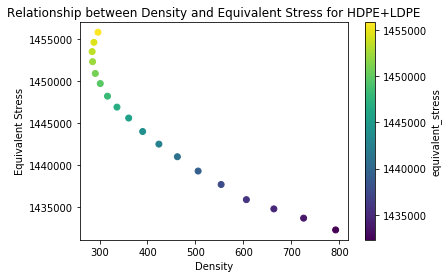

----- LDPE -----
Composition with the highest equivalent stress: 90
Density of the composition with the highest equivalent stress: 856.75




C:\Users\mpkha\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


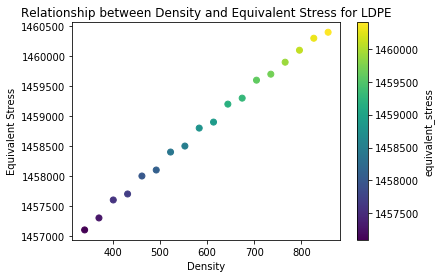

In [ ]:
for plastic_type, group in plastic_groups:
    print("-----", plastic_type, "-----")

    # Separate the features (composition, young's modulus, density) and target variable (equivalent stress)
    X = group[['Composition', 'youngs_modulus', 'Density']]
    y_stress = group['equivalent_stress']

    # Train a linear regression model to predict equivalent stress
    model_stress = LinearRegression()
    model_stress.fit(X, y_stress)

    # Make predictions for equivalent stress
    predictions_stress = model_stress.predict(X)

    # Combine the predicted values with the original data
    group['Predicted Stress'] = predictions_stress

    # Find the composition with the highest equivalent stress
    best_composition = group.loc[group['Predicted Stress'].idxmax()]

    # Find the composition with the lowest density among those with the highest equivalent stress
    best_density = group[group['Predicted Stress'] == group['Predicted Stress'].max()]['Density'].min()
    best_composition_density = group[(group['Predicted Stress'] == group['Predicted Stress'].max()) & (group['Density'] == best_density)]['Composition']

    print("Composition with the highest equivalent stress:", best_composition['Composition'])
    print("Density of the composition with the highest equivalent stress:", best_density)
    print("\n")

    # Data Visualization
    plt.scatter(group['Density'], group['equivalent_stress'], c=group['equivalent_stress'], cmap='viridis')
    plt.colorbar(label='equivalent_stress')
    plt.xlabel('Density')
    plt.ylabel('Equivalent Stress')
    plt.title(f'Relationship between Density and Equivalent Stress for {plastic_type}')
    plt.show()